In [7]:
import numpy as np
# import xarray as xr
from spacepy import pycdf

import pandas as pd

# import hvplot.xarray
import matplotlib.pyplot as plt
from matplotlib import colors, ticker, cm

import os, sys



ModuleNotFoundError: No module named 'spacepy'

In [2]:
# Identify data location
# directory = '/Volumes/mcgdrive/DMSPdata_v1_1_0/f16/2010/01'
directory = '/Users/ryanmcgranaghan/Desktop'
file = 'dmsp-f16_ssj_precipitating-electrons-ions_20100131_v1.1.0.cdf'

os.path.exists(os.path.join(directory,file))

# Load data
ds = pycdf.CDF(os.path.join(directory,file)) # with spacepy + CDF
# ds = xr.open_dataset(os.path.join(directory,file)) # with xarray (doesn't work with .cdf)


In [3]:
print(ds)

CHANNEL_ENERGIES: CDF_FLOAT [19] NRV
ELE_AVG_ENERGY: CDF_FLOAT [86400]
ELE_AVG_ENERGY_STD: CDF_FLOAT [86400]
ELE_COUNTS_BKG: CDF_FLOAT [86400, 19]
ELE_COUNTS_OBS: CDF_FLOAT [86400, 19]
ELE_DIFF_ENERGY_FLUX: CDF_FLOAT [86400, 19]
ELE_DIFF_ENERGY_FLUX_STD: CDF_FLOAT [86400, 19]
ELE_GEOMETRIC: CDF_DOUBLE [19] NRV
ELE_TOTAL_ENERGY_FLUX: CDF_FLOAT [86400]
ELE_TOTAL_ENERGY_FLUX_STD: CDF_FLOAT [86400]
Epoch: CDF_EPOCH [86400]
ION_AVG_ENERGY: CDF_FLOAT [86400]
ION_AVG_ENERGY_STD: CDF_FLOAT [86400]
ION_COUNTS_BKG: CDF_FLOAT [86400, 19]
ION_COUNTS_OBS: CDF_FLOAT [86400, 19]
ION_DIFF_ENERGY_FLUX: CDF_FLOAT [86400, 19]
ION_DIFF_ENERGY_FLUX_STD: CDF_FLOAT [86400, 19]
ION_GEOMETRIC: CDF_DOUBLE [19] NRV
ION_TOTAL_ENERGY_FLUX: CDF_FLOAT [86400]
ION_TOTAL_ENERGY_FLUX_STD: CDF_FLOAT [86400]
SC_AACGM_LAT: CDF_DOUBLE [86400]
SC_AACGM_LON: CDF_DOUBLE [86400]
SC_AACGM_LTIME: CDF_DOUBLE [86400]
SC_ECI: CDF_DOUBLE [86400, 3]
SC_ECI_LABEL: CDF_CHAR*5 [3] NRV
SC_GEOCENTRIC_LAT: CDF_DOUBLE [86400]
SC_GEOCENTRIC_

In [4]:
print('{:>10}'.format('test'))
print('{:^10}'.format('test'))
print('{:03.2f}'.format(3.1415296))


      test
   test   
3.14


In [5]:
channel_energies = ds['CHANNEL_ENERGIES'][...]
print(channel_energies)

[30000. 20400. 13900.  9450.  6460.  4400.  3000.  2040.  1392.   949.
   646.   440.   300.   204.   139.    95.    65.    44.    30.]


In [8]:
# Create DataFrame and xarray from CDF data

df = pd.DataFrame()
df['datetime'] = pd.Series(ds['Epoch'][...])

for i in ds:
    print('key = {}'.format(i))
    print('shape of data = {}'.format(ds[i].shape))
    print('')

    # DataFrame
    if (i == 'SC_GEOCENTRIC_LAT'):
        df[i] = pd.Series(ds[i][...])
    elif (i == 'SC_GEOCENTRIC_LON'):
        df[i] = pd.Series(ds[i][...])
    elif (i == 'SC_GEOCENTRIC_R'):
        df[i] = pd.Series(ds[i][...])
    elif (i == 'SC_AACGM_LAT'):
        df[i] = pd.Series(ds[i][...])
    elif (i == 'SC_AACGM_LON'):
        df[i] = pd.Series(ds[i][...])
    elif (i == 'SC_AACGM_LTIME'):
        df[i] = pd.Series(ds[i][...])
    elif (i == 'ELE_DIFF_ENERGY_FLUX'):
        for j in range(ds[i].shape[1]):
            df['ELE_DIFF_ENERGY_FLUX: channel energy=' + str(channel_energies[j])] = pd.Series(ds[i][:,j])
    elif (i == 'ELE_DIFF_ENERGY_FLUX_STD'):
        for j in range(ds[i].shape[1]):
            df['ELE_DIFF_ENERGY_FLUX_STD: channel energy=' + str(channel_energies[j])] = pd.Series(ds[i][:,j])
    elif (i == 'ELE_TOTAL_ENERGY_FLUX'):
        df[i] = pd.Series(ds[i][...])
    elif (i == 'ELE_TOTAL_ENERGY_FLUX_STD'):
        df[i] = pd.Series(ds[i][...])
    elif (i == 'ELE_AVG_ENERGY'):
        df[i] = pd.Series(ds[i][...])
    elif (i == 'ELE_AVG_ENERGY_STD'):
        df[i] = pd.Series(ds[i][...])
        
    print('')
        
    # xarray
#     if np.size(ds[i].shape) > 1:

#         for j in range(ds[i].shape[1]):
#             key_temp = i+'{:02.0f}'.format(j)
#             print('     sub key = {}'.format(key_temp))
#             # Save data as xarray (with dimensions and coordinates)

key = Epoch
shape of data = (86400,)


key = SC_ECI
shape of data = (86400, 3)


key = SC_ECI_LABEL
shape of data = (3,)


key = SC_GEOCENTRIC_LAT
shape of data = (86400,)


key = SC_GEOCENTRIC_LON
shape of data = (86400,)


key = SC_GEOCENTRIC_R
shape of data = (86400,)


key = SC_AACGM_LAT
shape of data = (86400,)


key = SC_AACGM_LON
shape of data = (86400,)


key = SC_AACGM_LTIME
shape of data = (86400,)


key = CHANNEL_ENERGIES
shape of data = (19,)


key = ELE_COUNTS_OBS
shape of data = (86400, 19)


key = ELE_COUNTS_BKG
shape of data = (86400, 19)


key = ELE_GEOMETRIC
shape of data = (19,)


key = ELE_DIFF_ENERGY_FLUX
shape of data = (86400, 19)


key = ELE_DIFF_ENERGY_FLUX_STD
shape of data = (86400, 19)


key = ELE_TOTAL_ENERGY_FLUX
shape of data = (86400,)


key = ELE_TOTAL_ENERGY_FLUX_STD
shape of data = (86400,)


key = ELE_AVG_ENERGY
shape of data = (86400,)


key = ELE_AVG_ENERGY_STD
shape of data = (86400,)


key = ION_COUNTS_OBS
shape of data = (86400, 19)


key = ION_

In [9]:
df.head(5)

datetime  SC_GEOCENTRIC_LAT  SC_GEOCENTRIC_LON  SC_GEOCENTRIC_R  \
0 2010-01-31 00:00:00         -57.266228          93.910564      7228.487161   
1 2010-01-31 00:00:01         -57.322730          93.876111      7228.490093   
2 2010-01-31 00:00:02         -57.379225          93.841563      7228.493027   
3 2010-01-31 00:00:03         -57.435715          93.806921      7228.495963   
4 2010-01-31 00:00:04         -57.492195          93.772186      7228.498900   

   SC_AACGM_LAT  SC_AACGM_LON  SC_AACGM_LTIME  \
0    -70.866027    148.180405        4.557747   
1    -70.911881    148.066941        4.550466   
2    -70.957639    147.952958        4.543149   
3    -71.003365    147.838547        4.535805   
4    -71.048978    147.723679        4.528429   

   ELE_DIFF_ENERGY_FLUX: channel energy=30000.0  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   ELE_DIFF_ENERGY_FLUX: channel energy=20400.0  \
0                                  510561.21875   
1                                       0.00000   
2                                       0.00000   
3                                       0.00000   
4                                       0.00000   

   ELE_DIFF_ENERGY_FLUX: channel energy=13900.0  ...  \
0                                  1.339513e+06  ...   
1                                  0.000000e+00  ...   
2                                  0.000000e+00  ...   
3                                  0.000000e+00  ...   
4                                  2.232522e+05  ...   

   ELE_DIFF_ENERGY_FLUX_STD: channel energy=204.0  \
0                                        0.256205   
1                                        0.268809   
2                                        0.275162   
3                                        0.275162   
4                                        0.282843   

   ELE_DIFF_ENERGY_FLUX_STD: channel energy=139.0  \
0                                        0.272915   
1                                        0.238640   
2                                        0.326599   
3                                        0.388730   
4                                        0.275162   

   ELE_DIFF_ENERGY_FLUX_STD: channel energy=95.0  \
0                                       0.296005   
1                                       0.228141   
2                                       0.326599   
3                                       0.427618   
4                                       0.265147   

   ELE_DIFF_ENERGY_FLUX_STD: channel energy=65.0  \
0                                       0.320156   
1                                       0.216779   
2                                       0.275162   
3                                       0.388730   
4                                       0.268809   

   ELE_DIFF_ENERGY_FLUX_STD: channel energy=44.0  \
0                                       0.224781   
1                                       0.207000   
2                                       0.351188   
3                                       0.351188   
4                                       0.211107   

   ELE_DIFF_ENERGY_FLUX_STD: channel energy=30.0  ELE_TOTAL_ENERGY_FLUX  \
0                                       0.217732           1.073550e+11   
1                                       0.210545           2.400544e+10   
2                                       0.351188           8.597387e+09   
3                                       0.489898           7.399737e+09   
4                                       0.212434           1.398481e+10   

   ELE_TOTAL_ENERGY_FLUX_STD  ELE_AVG_ENERGY  ELE_AVG_ENERGY_STD  
0                   0.091754     1263.168457            0.091779  
1                   0.097196      206.250397            0.097240  
2                   0.138842      549.445435            0

In [10]:
cols_to_plot = []

for i in range(df.shape[1]):
    if 'ELE_DIFF_ENERGY_FLUX:' in df.columns[i]:
        cols_to_plot.append(i)
print(cols_to_plot)
print(np.shape(cols_to_plot))

[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
(19,)


In [11]:
np.shape( np.transpose( df.iloc[:,cols_to_plot].values ) )

(19, 86400)

In [12]:
df.shape

(86400, 49)

In [13]:
dts_idxs = [0,1000]
plot_dts = df['datetime'][dts_idxs[0]:dts_idxs[1]]
plot_mlats = df['SC_AACGM_LAT'][dts_idxs[0]:dts_idxs[1]]
plot_mlts = df['SC_AACGM_LTIME'][dts_idxs[0]:dts_idxs[1]]
plot_data = np.transpose( df.iloc[:,cols_to_plot].values[dts_idxs[0]:dts_idxs[1]] )
plot_data[plot_data == 0] = np.nan

plot_xticklabels = []
for l in range(len(plot_dts)):
#     plot_xticklabels[l] = '{}\n{:.2f}\n{:.2f}'.format(plot_dts[l],plot_mlats[l],plot_mlts[l])
    plot_xticklabels.append( '{}\n{:.2f}\n{:.2f}'.format(plot_dts[l],plot_mlats[l],plot_mlts[l]) )

In [14]:
# print('{}\n{}'.format(plot_dts[l],1))
# plot_xticklabels.shape
print( '{}\n{:.2f}\n{:.2f}'.format(plot_dts[l],plot_mlats[l],plot_mlts[l]) )

2010-01-31 00:16:39
-51.60
19.69


In [15]:
np.shape( plot_xticklabels )

chc = 10

print( plot_dts[chc] )
print( plot_mlats[chc] )
print( plot_mlts[chc] )
print( plot_xticklabels[chc] )


2010-01-31 00:00:10
-71.32105741491092
4.483497169719006
2010-01-31 00:00:10
-71.32
4.48


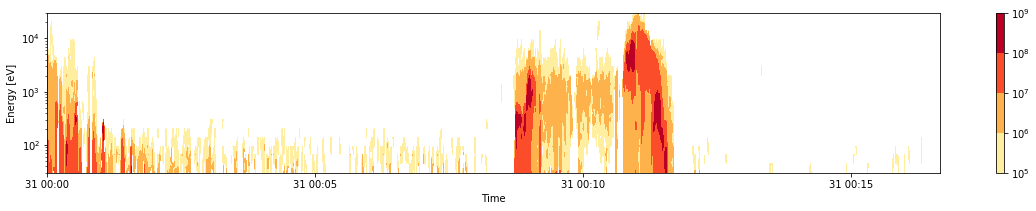

In [31]:
dts_idxs = [0,1000]
# dts_idxs = [2000,2100]
dx = 500 # set x tick labels intervals
plot_dts = df['datetime'][dts_idxs[0]:dts_idxs[1]]
plot_mlats = df['SC_AACGM_LAT'][dts_idxs[0]:dts_idxs[1]]
plot_mlts = df['SC_AACGM_LTIME'][dts_idxs[0]:dts_idxs[1]]
# plot_dts = df['datetime'][dts_idxs[0]:dts_idxs[1]].values
# plot_mlats = df['SC_AACGM_LAT'][dts_idxs[0]:dts_idxs[1]].values
# plot_mlts = df['SC_AACGM_LTIME'][dts_idxs[0]:dts_idxs[1]].values
plot_data = np.transpose( df.iloc[:,cols_to_plot].values[dts_idxs[0]:dts_idxs[1]] )
plot_data[plot_data == 0] = np.nan

plot_xticklabels = []
for l in range(len(plot_dts)):
#     plot_xticklabels[l] = '{}\n{:.2f}\n{:.2f}'.format(plot_dts[l],plot_mlats[l],plot_mlts[l])
    plot_xticklabels.append( '{}\n{:.2f}\n{:.2f}'.format(plot_dts[l],plot_mlats[l],plot_mlts[l]) )
    
    
xx,yy = np.meshgrid(plot_dts,channel_energies)

fig = plt.figure(1,figsize=(20,10))

ax = plt.subplot(311)
h = plt.contourf(xx,yy,plot_data,locator=ticker.LogLocator(),cmap='YlOrRd')
ax.set_yscale('log')
plt.colorbar()
# ax.set_xticks(plot_dts[0:dx:].values)
# ax.set_xticklabels(plot_xticklabels[0:dx:])
ax.set_xlabel('Time')
ax.set_ylabel('Energy [eV]')

plt.show()


In [32]:
plot_data[0:10:]

array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [  510561.22,         nan,         nan, ...,         nan,
                nan,         nan],
       [ 1339513.1 ,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [12899278.  ,  4400930.5 ,  3186880.8 , ...,         nan,
                nan,         nan],
       [13037080.  ,  4248037.5 ,  2783197.  , ...,         nan,
                nan,         nan],
       [22986660.  ,  6063965.5 ,  1833291.9 , ...,         nan,
                nan,         nan]], dtype=float32)

In [ ]:
print(df.shape)
df = df[df['SC_AACGM_LAT'] >= np.abs(45)]
print(df.shape)

In [55]:
file_directory = '/Volumes/mcgdrive/DMSPdata_v1_1_0/'
directory_chc = os.path.join(file_directory,'f{:02.0f}'.format(sat),'{:04.0f}'.format(yr),'{:02.0f}'.format(mn))
print(directory_chc)

os.path.exists(directory_chc)

/Volumes/mcgdrive/DMSPdata_v1_1_0/f16/2010/01


True

In [71]:
# Create a function to take a satellite, year, month, and day and save a csv file from Pandas DataFrame


def DMSP_SSJ_CDF_to_DataFrame(sat,yr,mn,dy,load_directory,save_directory):
    "  DMSP_SSJ_CDF_to_DataFrame reads data from CDF files created by NCEI (https://www.ngdc.noaa.gov/) "
    "    and saves a csv file of the Pandas Dataframe created as a subset of the full data              "
    
    function_directory = os.path.join(load_directory,'f{:02.0f}'.format(sat),'{:04.0f}'.format(yr),'{:02.0f}'.format(mn))
    file = 'dmsp-f{:02.0f}_ssj_precipitating-electrons-ions_{:04.0f}{:02.0f}{:02.0f}_v1.1.0.cdf'.format(sat,yr,mn,dy)
    
    function_file = os.path.join(function_directory,file)
    
    if (os.path.exists(function_file) == False):
        print('Attempted to load file={}\n........'.format(function_file))
        print('Exiting because file does not exist\n  --->Will not save data for:\n     sat=F{:02.0f}\n     year={:04.0f}\n     month={:02.0f}\n     day={:02.0f}'.format(sat,yr,mn,dy))
        return
    
    # Load data
    try:
        ds = pycdf.CDF(function_file) # with spacepy + CDF
        channel_energies = ds['CHANNEL_ENERGIES'][...]
    except:
        print('Could not open CDF for:\n     sat=F{:02.0f}\n     year={:04.0f}\n     month={:02.0f}\n     day={:02.0f}'.format(sat,yr,mn,dy))
        return
    
    # Create DataFrame

    df = pd.DataFrame()
    df['datetime'] = pd.Series(ds['Epoch'][...])

    for i in ds:
        # DataFrame
        if (i == 'SC_GEOCENTRIC_LAT'):
            df[i] = pd.Series(ds[i][...])
        elif (i == 'SC_GEOCENTRIC_LON'):
            df[i] = pd.Series(ds[i][...])
        elif (i == 'SC_GEOCENTRIC_R'):
            df[i] = pd.Series(ds[i][...])
        elif (i == 'SC_AACGM_LAT'):
            df[i] = pd.Series(ds[i][...])
        elif (i == 'SC_AACGM_LON'):
            df[i] = pd.Series(ds[i][...])
        elif (i == 'SC_AACGM_LTIME'):
            df[i] = pd.Series(ds[i][...])
        elif (i == 'ELE_DIFF_ENERGY_FLUX'):
            for j in range(ds[i].shape[1]):
                df['ELE_DIFF_ENERGY_FLUX: channel energy=' + str(channel_energies[j])] = pd.Series(ds[i][:,j])
        elif (i == 'ELE_DIFF_ENERGY_FLUX_STD'):
            for j in range(ds[i].shape[1]):
                df['ELE_DIFF_ENERGY_FLUX_STD: channel energy=' + str(channel_energies[j])] = pd.Series(ds[i][:,j])
        elif (i == 'ELE_TOTAL_ENERGY_FLUX'):
            df[i] = pd.Series(ds[i][...])
        elif (i == 'ELE_TOTAL_ENERGY_FLUX_STD'):
            df[i] = pd.Series(ds[i][...])
        elif (i == 'ELE_AVG_ENERGY'):
            df[i] = pd.Series(ds[i][...])
        elif (i == 'ELE_AVG_ENERGY_STD'):
            df[i] = pd.Series(ds[i][...])
                

    # Remove data outside of high-latitude regimes
    df = df[df['SC_AACGM_LAT'] >= np.abs(45)]
    
    # Save the DataFrame
    day_of_year = df['datetime'].iloc[0].timetuple().tm_yday
    save_file = os.path.join(save_directory,'dmsp-f{:02.0f}_ssj_{:04.0f}_{:03.0f}_v1.1.0.csv'.format(sat,yr,day_of_year))
    pd.DataFrame.to_csv(df,save_file,na_rep='NaN')

    return

In [72]:
%%time

load_directory = '/Volumes/mcgdrive/DMSPdata_v1_1_0/'
save_directory = '/Users/ryanmcgranaghan/Documents/DMSPdata/'
sat = 16
yr = 2010
mn = 1
dy = 15

DMSP_SSJ_CDF_to_DataFrame(sat,yr,mn,dy,load_directory,save_directory)

CPU times: user 2.62 s, sys: 74.7 ms, total: 2.7 s
Wall time: 3.07 s


In [70]:
os.path.exists('/Volumes/mcgdrive/DMSPdata_v1_1_0/f16/2010/01/dmsp-f16_ssj_precipitating-electrons-ions_20100115_v1.1.0.cdf')





True

In [45]:
day_of_year = dfdatetime.timetuple().tm_yday

exiting because file does not exist
  --->Will not save data for:
     sat=F16
     year=2010
     month=01
     day=01


In [47]:
file_chc2 = 'dmsp-f{:02.0f}_ssj_precipitating-electrons-ions_{:04.0f}{:02.0f}{:02.0f}_v1.1.0.cdf'.format(sat,yr,mn,dy)
print(file_chc2)

dmsp-f16_ssj_precipitating-electrons-ions_20100101_v1.1.0.cdf


In [77]:
datetime_start = datetime.datetime(2010,1,1)
input_datetimes = [ (datetime_start + datetime.timedelta(days=d)) for d in range(0,5) ]

In [78]:
df_datetimes = pd.to_datetime(input_datetimes)

In [93]:
df_datetimes.day[-1]

5